In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=2545&path=sales.csv')

In [3]:
main_df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


in this data i am looking for eda,any_na values any outlier and we are doing a predict

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
main_df['date'] = pd.to_datetime(main_df['date'])

In [6]:
main_df.isna().sum()

date     0
sales    0
dtype: int64

In [7]:
main_df.nunique()
#date and sale was equal so we dont need a groupy_mean we can use a copy()

date     366
sales    366
dtype: int64

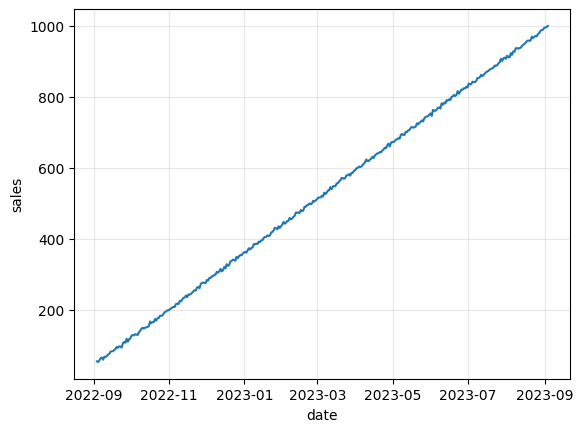

In [8]:
sns.lineplot(data=main_df,x='date',y='sales')
plt.grid(alpha=0.3)

<Axes: xlabel='sales', ylabel='Count'>

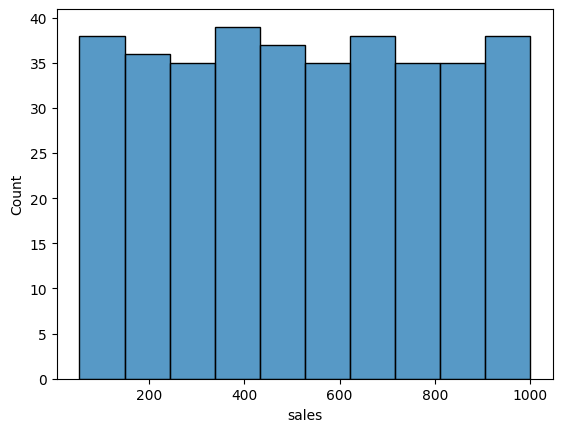

In [9]:
sns.histplot(data=main_df,x='sales')

In [10]:
#temp_df = main_df.groupby('date').mean()
temp_df = main_df.copy()

In [11]:
temp_df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


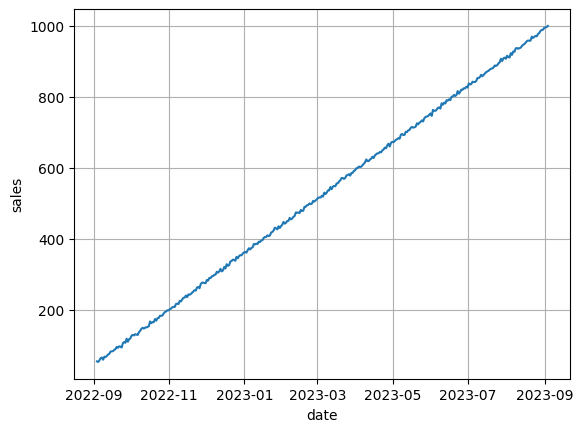

In [12]:
sns.lineplot(data=temp_df,x='date',y='sales')
plt.grid()

In [13]:
temp_df = temp_df.sort_values('date')

In [14]:
temp_df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


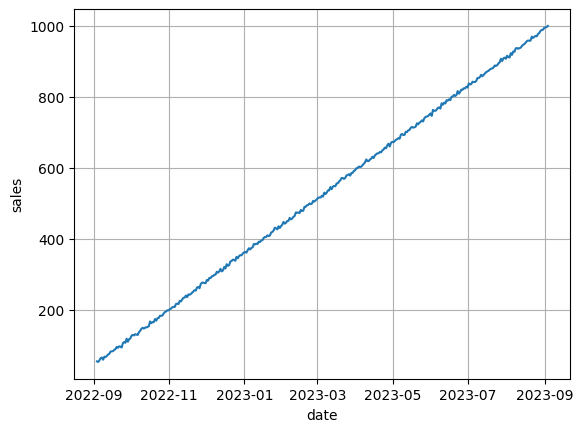

In [15]:
sns.lineplot(data=temp_df,x='date',y='sales')
plt.grid()

In [16]:
# Sales increase steadily over time

In [17]:
temp_df['daily_diffrence']= temp_df['sales'].diff()

In [18]:
temp_df

,date,sales,daily_diffrence
0,2022-09-03 17:10:08.079328,55.292157,NaN
1,2022-09-04 17:10:08.079328,53.803211,-1.488946
2,2022-09-05 17:10:08.079328,58.141693,4.338482
3,2022-09-06 17:10:08.079328,64.530899,6.389205
4,2022-09-07 17:10:08.079328,66.013633,1.482734
...,...,...,...
361,2023-08-30 17:10:08.079328,989.600354,0.518681
362,2023-08-31 17:10:08.079328,994.987326,5.386972
363,2023-09-01 17:10:08.079328,995.814415,0.827090
364,2023-09-02 17:10:08.079328,997.350214,1.535798


<Axes: xlabel='date', ylabel='daily_diffrence'>

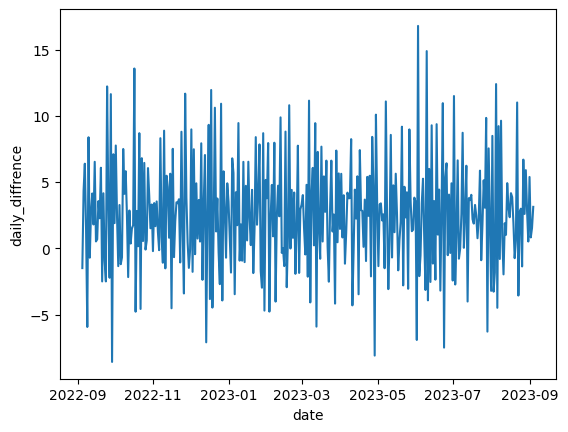

In [19]:

sns.lineplot(data=temp_df,x='date',y='daily_diffrence')


In [20]:
#this variable and column shows increase speed to sale
# Rolling average is used to smooth the data and see the overall trend.

In [21]:
# “Her gün için, son 200 günün ortalamasını hesapla.”
# “Bu veri uzun vadede yukarı mı gidiyor, aşağı mı?
# Rolling averages are used to smooth short-term fluctuations and highlight the underlying trend

In [22]:
temp_df['sales_roll120'] = temp_df['sales'].rolling(120).mean()

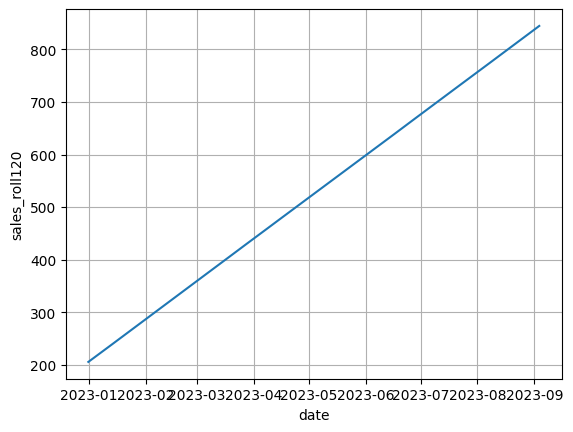

In [23]:
sns.lineplot(data=temp_df, x='date', y='sales_roll120')
plt.grid()

# The 120-day rolling average indicates a strong and steady upward trend in sales

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

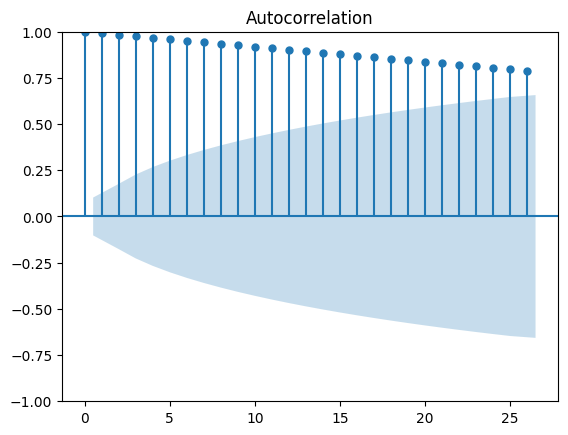

<Figure size 1400x300 with 0 Axes>

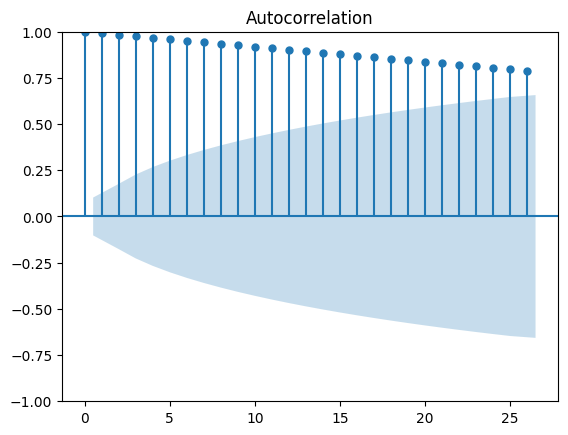

In [25]:
plt.figure(figsize=(14,3))
plot_acf(temp_df['sales'][:1000])

In [26]:
split_df = main_df.copy()
# i were created temp_df because eda i add. some feature in the temp_df
# we  add feature only supervısed predıct thıs one ıs ıf we add we wıll broke the predıct 
 

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition ayrisma
decomposition = seasonal_decompose(temp_df['sales'],period=7)
# bu hafta da bir tekrar eden bir desen hafta icin 7 yaptim

In [28]:
decomposition

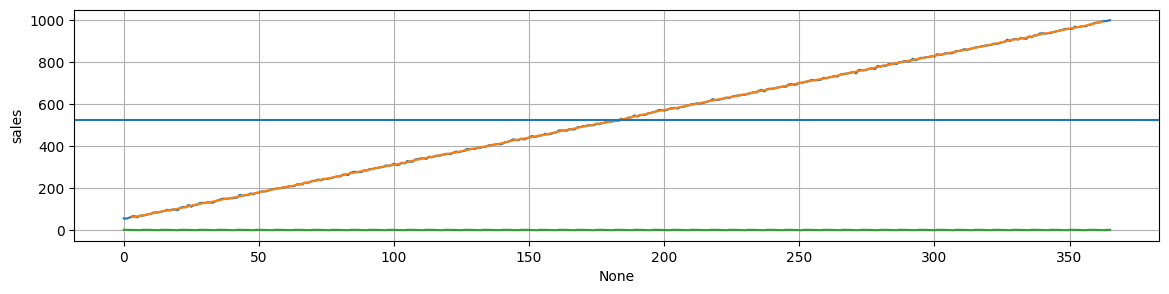

In [29]:
plt.figure(figsize=(14,3))
sns.lineplot(x=temp_df.index[:1000],y=temp_df['sales'][:1000])
sns.lineplot(decomposition.trend[:1000])
sns.lineplot(decomposition.seasonal[:1000])
plt.axhline(temp_df['sales'][:1000].mean())
plt.grid()

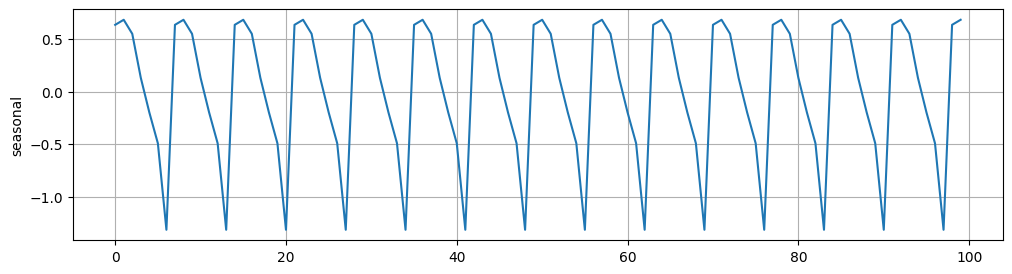

In [30]:
plt.figure(figsize=(12,3))
sns.lineplot(decomposition.seasonal[:100])
plt.grid()

In [31]:
'''
Yeşil çizgi = seasonal (haftalık tekrar)
Yani şuna bakıyor:
“Pazartesiler hep yüksek mi?
Cumalar hep düşük mü?
Her hafta aynı dalga tekrar ediyor mu?

Green line = seasonal (weekly repetition)
So it looks at this:
“Are Mondays always high?
Are Fridays always low?
Does the same wave repeat every week?'''

'\nYeşil çizgi = seasonal (haftalık tekrar)\nYani şuna bakıyor:\n“Pazartesiler hep yüksek mi?\nCumalar hep düşük mü?\nHer hafta aynı dalga tekrar ediyor mu?\n\nGreen line = seasonal (weekly repetition)\nSo it looks at this:\n“Are Mondays always high?\nAre Fridays always low?\nDoes the same wave repeat every week?'

In [32]:
'''
Yeşil = normal günlük ritim --> green =normal dailiy routine  Her hafta tekrar eden bir satış alışkanlığı YOK.
Turuncu = uzun vadeli değişim --> orange=long term change Günlük küçük oynamaları boşver, asıl gidişat ne?
Mavi çukur = hata --> blue=error or something happen in this day “Gerçekte satışlar zamanla nasıl değişmiş?'''

'\nYeşil = normal günlük ritim --> green =normal dailiy routine  Her hafta tekrar eden bir satış alışkanlığı YOK.\nTuruncu = uzun vadeli değişim --> orange=long term change Günlük küçük oynamaları boşver, asıl gidişat ne?\nMavi çukur = hata --> blue=error or something happen in this day “Gerçekte satışlar zamanla nasıl değişmiş?'

In [33]:
# the green line says there was no daily routine
# orange line what is the main trend 
# blue in reality how is the sale change 


<Axes: ylabel='sales'>

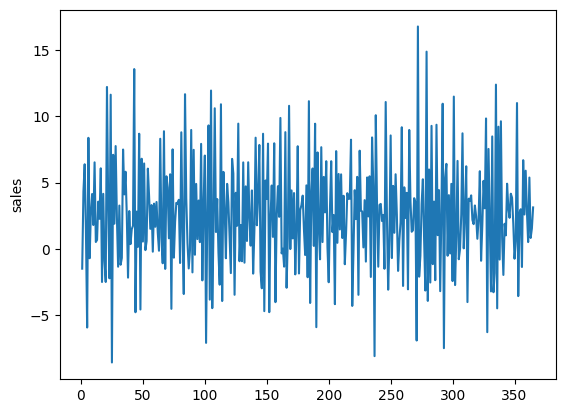

In [34]:
sns.lineplot(temp_df['sales'].diff())

<Axes: >

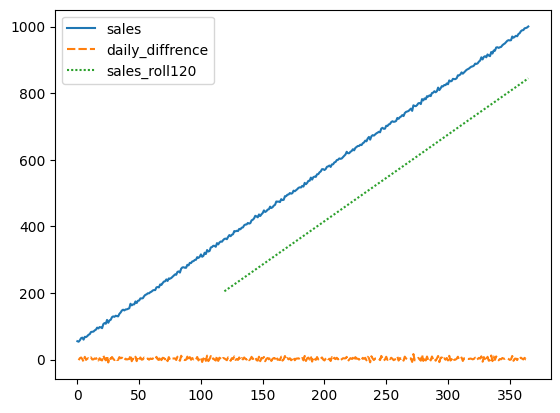

In [35]:
sns.lineplot(temp_df)

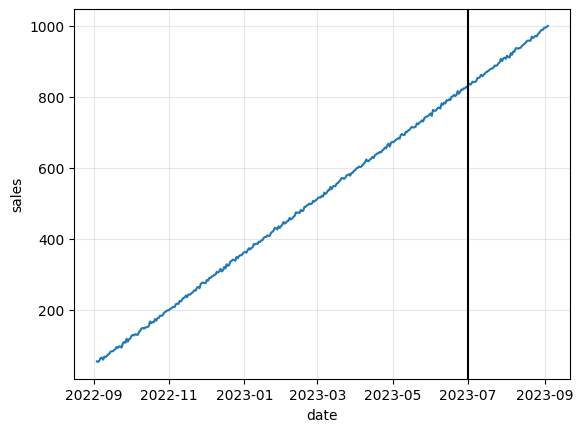

In [36]:
sns.lineplot(data=split_df,x='date',y='sales')
plt.axvline(pd.to_datetime('2023-07-01'),color='Black')
plt.grid(alpha=0.3)

In [37]:
split_df = split_df.set_index('date').sort_index()

In [38]:
split_df

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633
...,...
2023-08-30 17:10:08.079328,989.600354
2023-08-31 17:10:08.079328,994.987326
2023-09-01 17:10:08.079328,995.814415


In [39]:
cutoff_date= pd.to_datetime('2023-07-01')
training_set = split_df[split_df.index < cutoff_date]
testing_set = split_df[split_df.index >= cutoff_date]



In [40]:
training_set.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


In [41]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301 entries, 2022-09-03 17:10:08.079328 to 2023-06-30 17:10:08.079328
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   301 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [42]:
testing_set.head()

,sales
date,
2023-07-01 17:10:08.079328,838.399050
2023-07-02 17:10:08.079328,835.672905
2023-07-03 17:10:08.079328,836.589602
2023-07-04 17:10:08.079328,843.232026
2023-07-05 17:10:08.079328,842.453457


In [43]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2023-07-01 17:10:08.079328 to 2023-09-03 17:10:08.079328
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   65 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


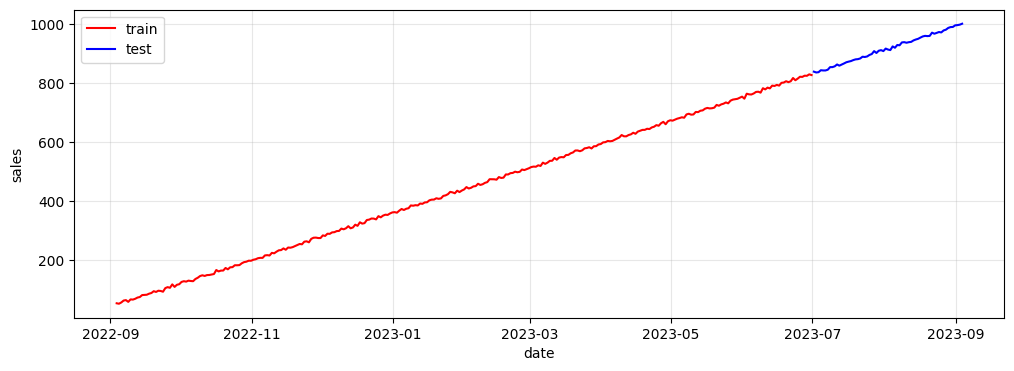

In [44]:
plt.figure(figsize=(12,4))

sns.lineplot(data=training_set, x=training_set.index, y='sales', label='train', color='red')
sns.lineplot(data=testing_set,  x=testing_set.index,  y='sales', label='test',  color='blue')

plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
model = ARIMA(endog=training_set,order=(2,  # p the number of autoregression terms  p = kaç gün geriye bakıyorum
                                         1, # d the number of differencing terms d, “kaçtayım?” yerine “ne kadar değiştim?” diye sordurur.
                                         2)) # q the number of moving average terms)) q DÜN NE KADAR SAÇMALADIM


/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [47]:
results = model.fit()

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date', ylabel='sales'>

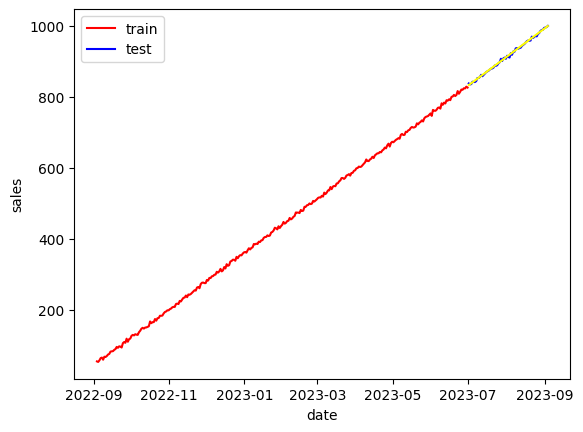

In [51]:
arima_predictions = results.get_forecast(steps=len(testing_set)).predicted_mean

sns.lineplot(data=training_set, x=training_set.index, y='sales', label='train', color='red')
sns.lineplot(data=testing_set,  x=testing_set.index,  y='sales', label='test',  color='blue')
sns.lineplot(x=testing_set.index,y=arima_predictions,color='yellow')